In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from glob import glob
import cv2
%matplotlib inline

In [2]:
info_path = '../dataset/cats_and_dogs/pets_dataset_info.csv'
cat_breeds = [
    'Abyssinian',
    'Bengal',
    'Birman',
    'Bombay',
    'British_Shorthair',
    'Egyptian_Mau',
    'Maine_Coon',
    'Persian',
    'Ragdoll',
    'Russian_Blue',
    'Siamese',
    'Sphynx'
]

dog_breeds=[
    'american_bulldog',
    'american_pit_bull_terrier',
    'basset_hound',
    'beagle',
    'boxer',
    'chihuahua',
    'english_cocker_spaniel',
    'english_setter',
    'german_shorthaired',
    'great_pyrenees',
    'havanese',
    'japanese_chin',
    'keeshond',
    'leonberger',
    'miniature_pinscher',
    'newfoundland',
    'pomeranian',
    'pug',
    'saint_bernard',
    'samoyed',
    'scottish_terrier',
    'shiba_inu',
    'staffordshire_bull_terrier',
    'wheaten_terrier',
    'yorkshire_terrier'
]


In [3]:
cat_breeds_dict = {k:v for v, k in enumerate(cat_breeds)}
dog_breeds_dict = {k:v for v, k in enumerate(dog_breeds)}
pet_breeds_dict = {k:v for v, k in enumerate(cat_breeds + dog_breeds)}

In [4]:
df = pd.read_csv(info_path)

In [5]:
def get_pet_and_breed_types(breeds):    
    pet_labels = [0, 0]
    breed_labels = [0] * len(pet_breeds_dict)
    for idx, breed in enumerate(breeds):
        pet_type = 0 if breed in cat_breeds else 1
        pet_labels[pet_type] = 1        
        breed_type = pet_breeds_dict[breed]        
        breed_labels[breed_type] = 1
    labels = pet_labels + breed_labels
    return labels
        
breeds = df['Breed'].apply(lambda x: ast.literal_eval(x))
multi_label_cols = ['cat', 'dog'] + list(pet_breeds_dict.keys())
df[multi_label_cols] = breeds.apply(get_pet_and_breed_types).apply(pd.Series)

df_pet = df.copy()

### created new columns in the dataframe using the pet type and corresponding breed type

In [6]:
df_pet.head()

Sample_ID                    Breed  PET_ID  cat  \
0  e23e7fba-cdcf-59fc-b6e1-3dbae82c3f36              ['samoyed']     [1]    0   
1  bd3703af-9e60-5667-a6ca-e4f5a71e319b              ['samoyed']     [2]    0   
2  e1a0b2fa-5b34-565b-9f64-96704101804c             ['keeshond']     [3]    0   
3  dd9e09f2-8d78-5bcb-8873-d52c6ed83d1b  ['Persian', 'havanese']  [4, 5]    1   
4  a8d71823-ace8-5898-b017-209f9ef4cda9              ['samoyed']     [6]    0   

   dog  Abyssinian  Bengal  Birman  Bombay  British_Shorthair  ...  \
0    1           0       0       0       0                  0  ...   
1    1           0       0       0       0                  0  ...   
2    1           0       0       0       0                  0  ...   
3    1           0       0       0       0                  0  ...   
4    1           0       0       0       0                  0  ...   

   newfoundland  pomeranian  pug  saint_bernard  samoyed  scottish_terrier  \
0             0           0    0              0        1                 0   
1             0           0    0              0        1                 0   
2             0           0    0              0        0                 0   
3             0           0    0              0        0                 0   
4             0           0    0              0        1                 0   

   shiba_inu  staffordshire_bull_terrier  wheaten_terrier  yorkshire_terrier  
0          0                           0                0                  0  
1          0                           0                0                  0  
2          0                           0                0                  0  
3          0                           0                0                  0  
4          0                           0                0                  0  

[5 rows x 42 columns]

In [7]:
df_pet.to_csv('data.csv', index=False)

### How many images contain a single cat, a single dog, or both a cat and a dog?

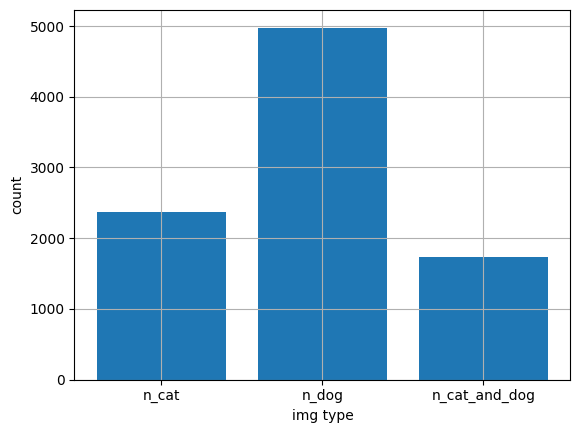

In [8]:
n_cat = df_pet[(df_pet['cat']==1)&(df_pet['dog']==0)].shape[0]
n_dog = df_pet[(df_pet['cat']==0)&(df_pet['dog']==1)].shape[0]
n_cat_and_dog = df_pet[(df_pet['cat']==1)&(df_pet['dog']==1)].shape[0]
plt.bar(['n_cat', 'n_dog', 'n_cat_and_dog'], [n_cat, n_dog, n_cat_and_dog])
plt.xlabel('img type')
plt.ylabel('count')
plt.grid()
plt.show()

#### So, there are almost twice as many images of single dogs as there are of single cats and of both cats and dogs combined. This is a sign of data imbalance.

### What about the data distribution of breeds?

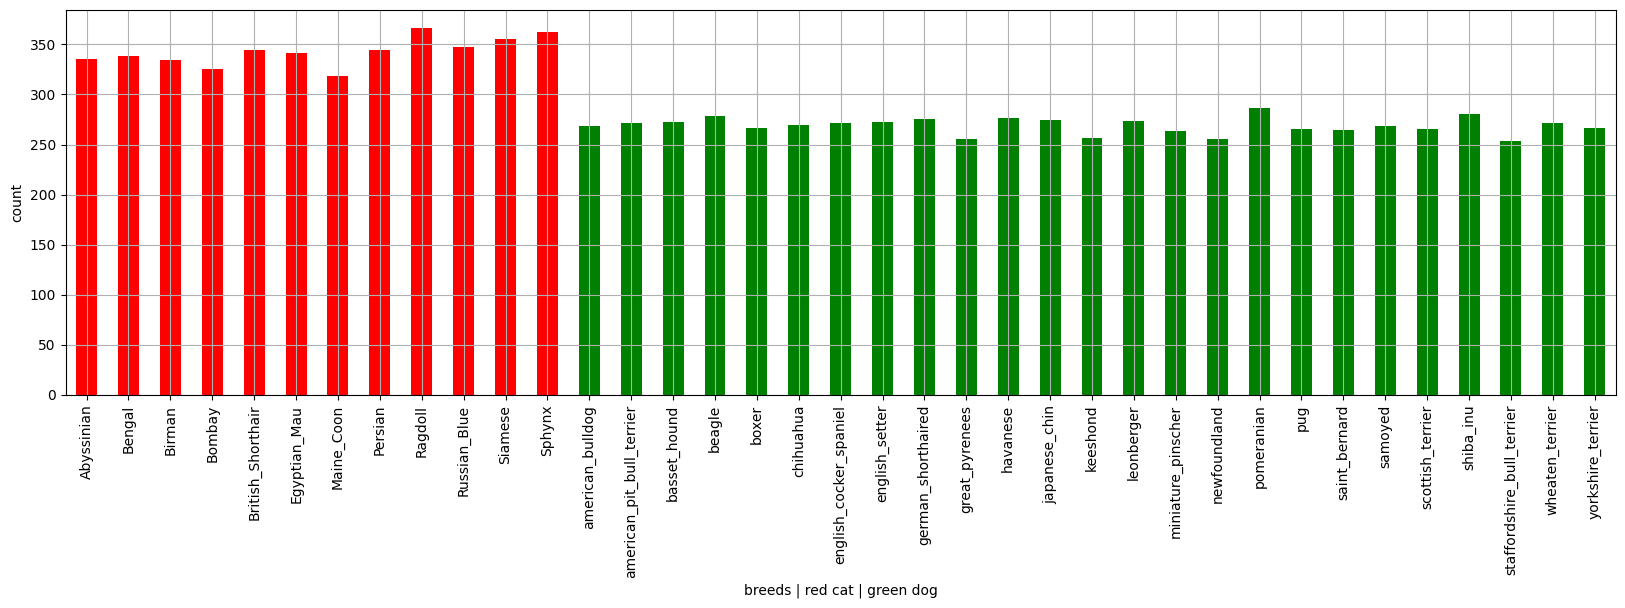

In [9]:
plt.figure(figsize=(20, 5))
df_breeds = df[list(pet_breeds_dict.keys())]
df_breeds_freq = df_breeds.sum()
df_breeds_freq.plot(kind='bar', )
colors = ['red' if i < len(cat_breeds) else 'green' for i in range(len(df_breeds_freq))]
df_breeds_freq.plot(kind='bar', color=colors)
plt.xlabel('breeds | red cat | green dog')
plt.ylabel('count')
plt.grid()

#### The frequency of dog breeds are slightly lower than cats. Not that much imbalanced.

In [10]:
images = sorted(glob('../dataset/cats_and_dogs/data/*/image.jpg'))
masks = sorted(glob('../dataset/cats_and_dogs/data/*/mask.jpg'))
print (f'Number of images {len(images)}')
print (f'Number of masks {len(masks)}')

Number of images 9087
Number of masks 9087


### Plot some images and corresponding masks.

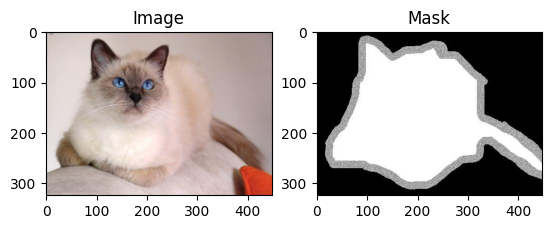

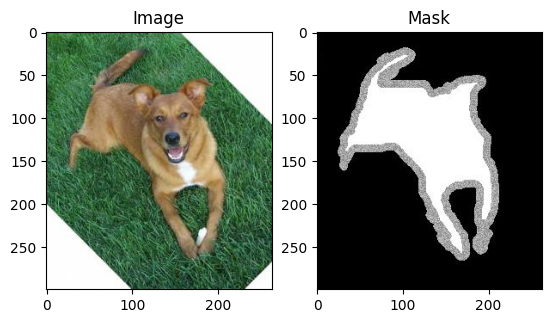

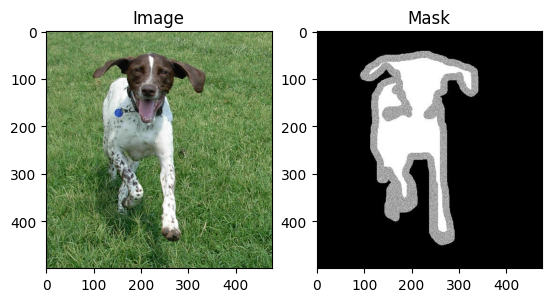

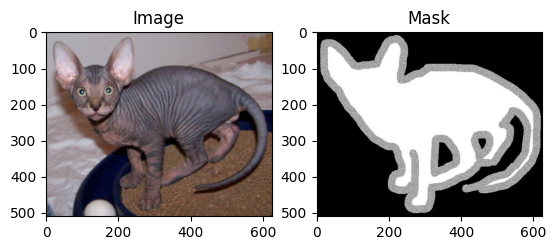

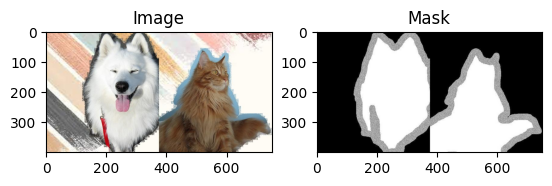

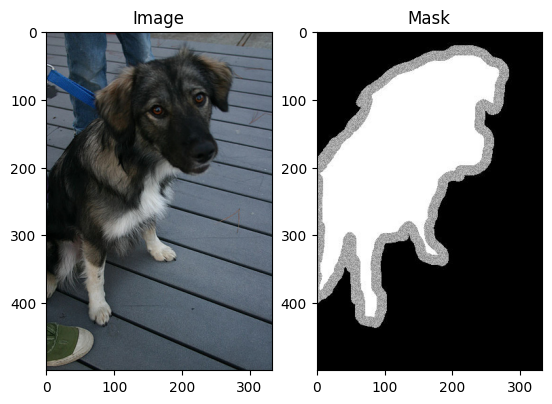

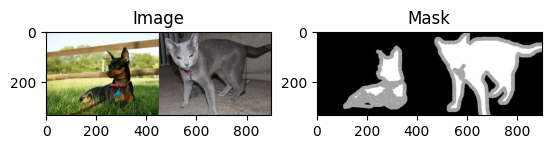

In [11]:
def plot_img_and_mask(img, mask):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].imshow(img)
    axes[0].set_title('Image')
    # axes[0].axis('off')    
    
    axes[1].imshow(mask)
    axes[1].set_title('Mask')
    # axes[1].axis('off')
    plt.show()

for n, (imgp, maskp) in enumerate(zip(images, masks)):
    img = cv2.imread(imgp)
    img = cv2.cvtColor(img,  cv2.COLOR_BGR2RGB)
    mask = cv2.imread(maskp)
    plot_img_and_mask(img, mask)
    if n > 5: break
    

### Looks like there are different sizes of images in the dataset. We will plot some of the largest and smallest images by width and height.

In [12]:
images_h, images_w = [], []
for imgp in images:
    img = cv2.imread(imgp)
    h, w, _ = img.shape
    images_h.append((imgp, h))
    images_w.append((imgp, w))

images_h = sorted(images_h, key = lambda x: x[1])
images_w = sorted(images_w, key = lambda x: x[1])


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


### First plot the distribution of width and height.

Text(0, 0.5, '# images')

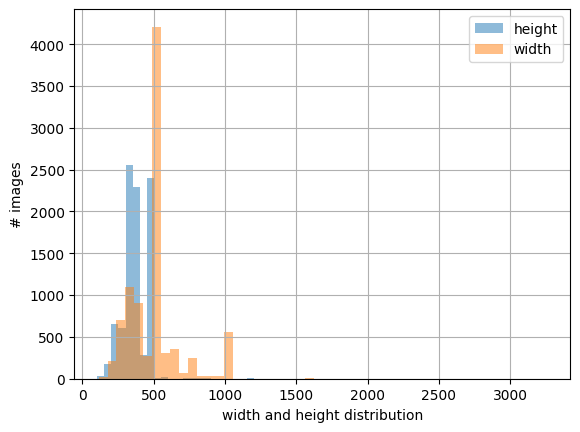

In [13]:
_ = plt.hist([h for _, h in images_h], bins=50, alpha=0.5, label='height')
_ = plt.hist([w for _, w in images_w], bins=50, alpha=0.5, label='width')
plt.legend()
plt.grid()
plt.xlabel('width and height distribution')
plt.ylabel('# images')

### There are some images with width or height too large. Let's plot some of the larger images to get an idea.

In [14]:
def show_images(_images):    
    for n, (imgp, _) in enumerate(_images):   
        print (imgp)
        img = cv2.imread(imgp)  
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
    

### Top 10 largest images by height

../dataset/cats_and_dogs/data/e975f714-2d53-5c1c-8753-d9bc7f706a2d/image.jpg


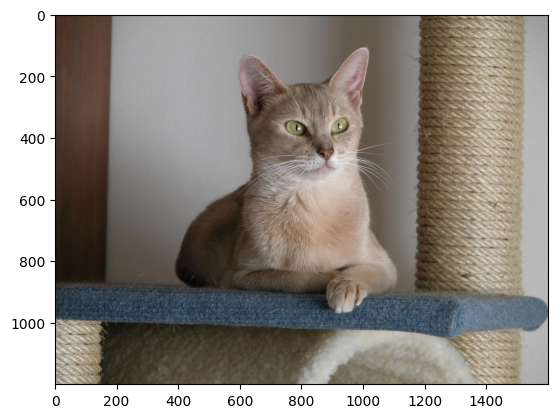

../dataset/cats_and_dogs/data/d15ee8ab-5118-59a8-a1d2-cc53d0d0f0b0/image.jpg


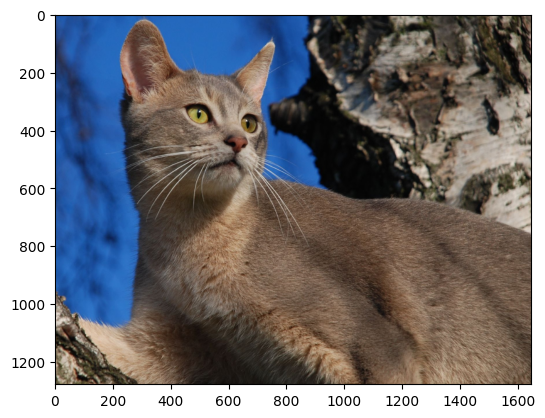

../dataset/cats_and_dogs/data/1b33bb97-3c6a-5ba1-80a2-8b06ac7ca32f/image.jpg


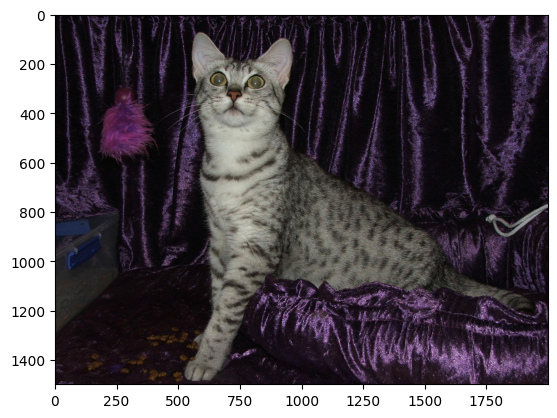

../dataset/cats_and_dogs/data/0847423b-6111-52ef-9298-338966822302/image.jpg


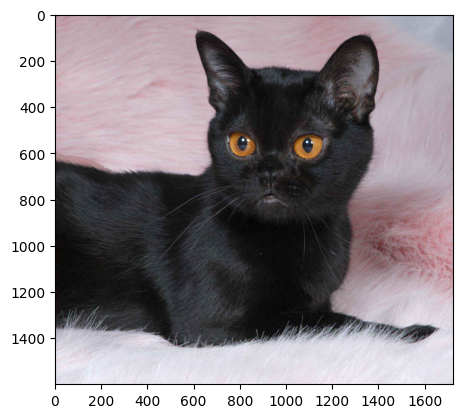

../dataset/cats_and_dogs/data/e219e814-5b54-5f51-8921-74b16c757e1b/image.jpg


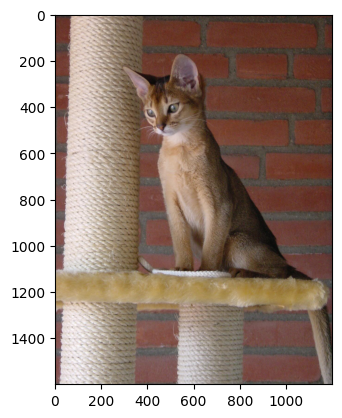

../dataset/cats_and_dogs/data/54e0d612-4220-521c-96dd-f49ddb75c1bc/image.jpg


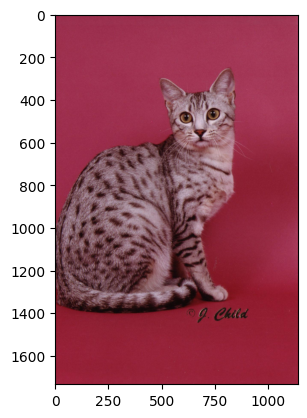

../dataset/cats_and_dogs/data/2c0c95d9-50a6-5e91-ad90-13b7543c957c/image.jpg


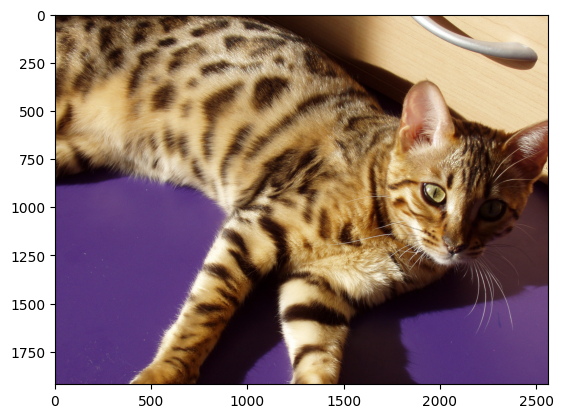

../dataset/cats_and_dogs/data/59822306-3695-55f9-a387-1bf4084f682e/image.jpg


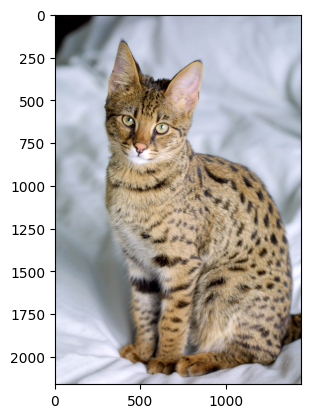

../dataset/cats_and_dogs/data/c2c66830-0ef2-5517-998e-4e3509da4373/image.jpg


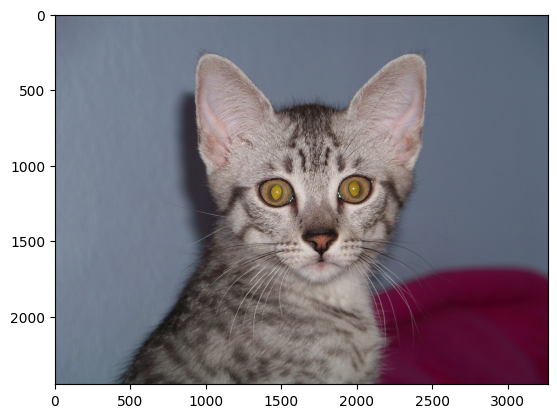

../dataset/cats_and_dogs/data/f59cadc7-9862-557f-aa76-aebe84d5285a/image.jpg


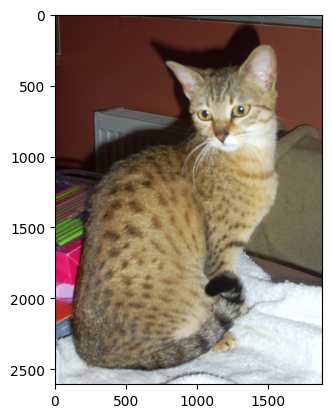

In [15]:
show_images(images_h[-10:])

### ### Top 10 largest images by width

../dataset/cats_and_dogs/data/18fd0297-77f3-5e7c-9aed-16f54948991c/image.jpg


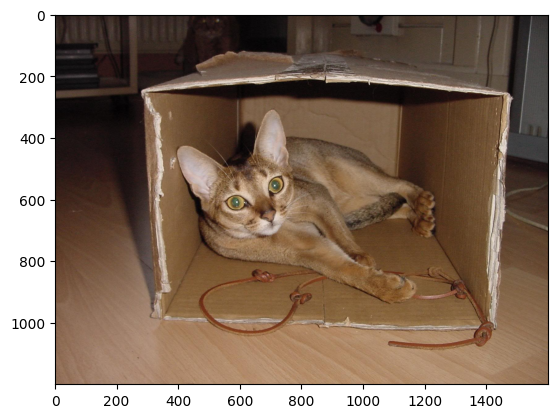

../dataset/cats_and_dogs/data/9bfc06fd-f523-57b7-914d-0d76ec4aa36d/image.jpg


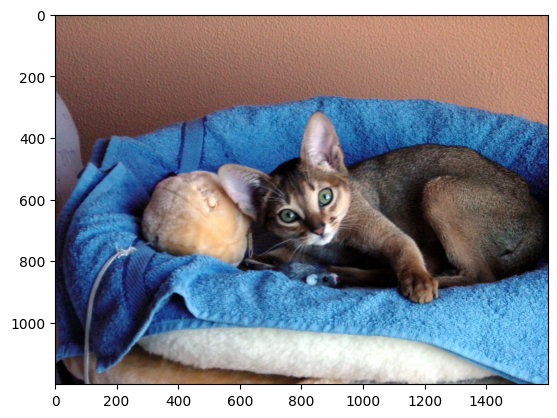

../dataset/cats_and_dogs/data/c5c0eaf7-36f7-5ef3-92af-87cb5e9a822c/image.jpg


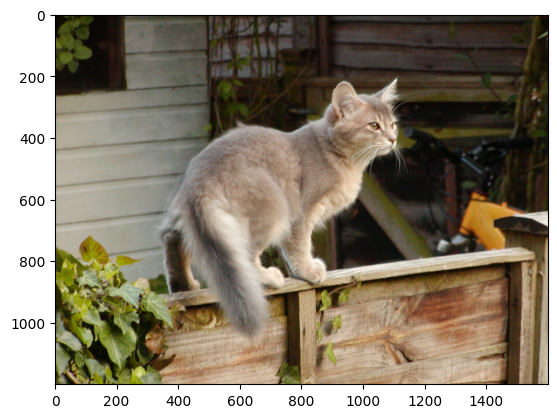

../dataset/cats_and_dogs/data/e975f714-2d53-5c1c-8753-d9bc7f706a2d/image.jpg


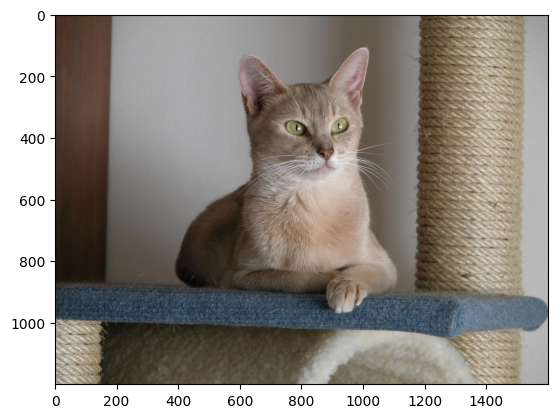

../dataset/cats_and_dogs/data/d15ee8ab-5118-59a8-a1d2-cc53d0d0f0b0/image.jpg


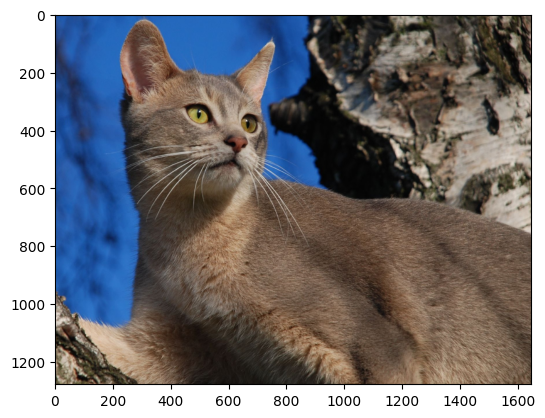

../dataset/cats_and_dogs/data/0847423b-6111-52ef-9298-338966822302/image.jpg


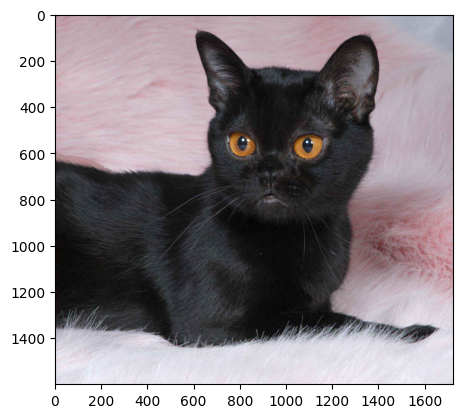

../dataset/cats_and_dogs/data/f59cadc7-9862-557f-aa76-aebe84d5285a/image.jpg


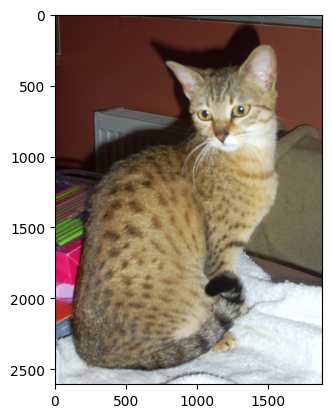

../dataset/cats_and_dogs/data/1b33bb97-3c6a-5ba1-80a2-8b06ac7ca32f/image.jpg


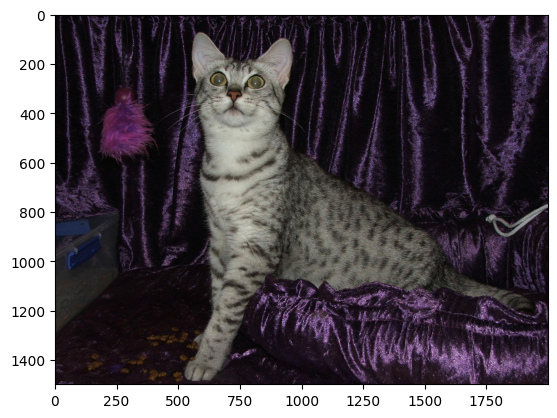

../dataset/cats_and_dogs/data/2c0c95d9-50a6-5e91-ad90-13b7543c957c/image.jpg


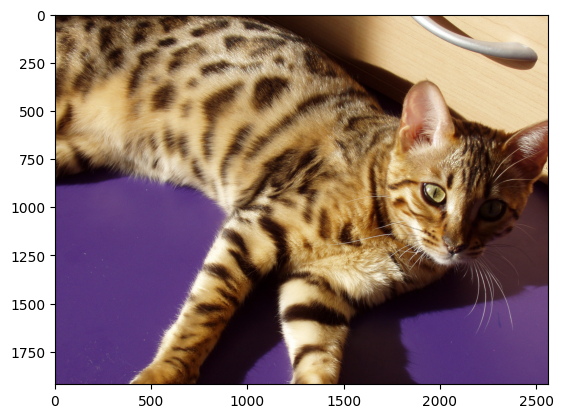

../dataset/cats_and_dogs/data/c2c66830-0ef2-5517-998e-4e3509da4373/image.jpg


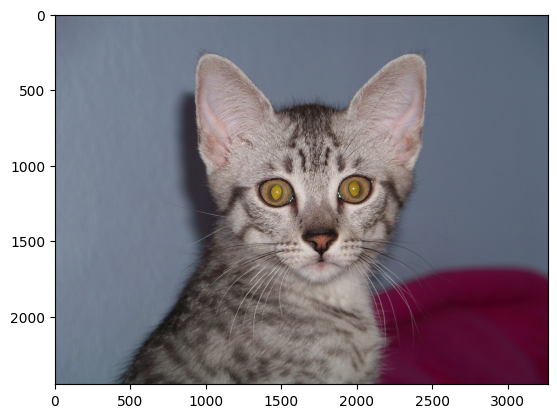

In [16]:
# smallest 16 images
show_images(images_w[-10:])

### During training we will resize the images into 256x256

### There are some corrupted images!

#### While iterating the images we see the following error messages. 

*Corrupt JPEG data: premature end of data segment*

*Corrupt JPEG data: 240 extraneous bytes before marker 0xd9*


In [17]:
for file_path in images:
    img = cv2.imread(file_path)
    print (file_path)
    break

../dataset/cats_and_dogs/data/0002288c-fb82-5b61-86ab-a2ae64438427/image.jpg


In [18]:
fp1 = '../dataset/cats_and_dogs/data/02747f81-6270-5637-8ea8-f7df9e4c8632/image.jpg'
fp2 = '../dataset/cats_and_dogs/data/0271b704-24a6-5562-9ab9-0435a3022c1f/image.jpg'
img = cv2.imread(fp2)

In [27]:
import cv2
import os
from PIL import Image


def check_corrupted_image(image_path):
    if image_path.endswith('jpg'):
        with open(image_path, 'rb') as f: 
            f.seek(-2, 2)
            print (f.read())
            if f.read() == '\xff\xd9':
                return True
            else:
                return False


def verify_jpeg_image(file_path):
    try:
        img = cv2.imread(file_path)
        img = Image.open(file_path)
        img.getdata()[0]
    except OSError:
        return False
    return True
    
for file in images:
    cv2.imread(file)
    # print (check_corrupted_image(file))
    im = Image.open(file)
    im.verify()  # PIL verify



Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


In [30]:
images

['../dataset/cats_and_dogs/data/0002288c-fb82-5b61-86ab-a2ae64438427/image.jpg',
 '../dataset/cats_and_dogs/data/000b3a32-cd57-5920-b2b6-36ba3196f989/image.jpg',
 '../dataset/cats_and_dogs/data/0012c117-0edb-5a34-ad49-920fedd7fdc3/image.jpg',
 '../dataset/cats_and_dogs/data/0015c645-ef58-586d-836f-29984afa113e/image.jpg',
 '../dataset/cats_and_dogs/data/001a614c-2d5b-5571-9783-1fdda5965940/image.jpg',
 '../dataset/cats_and_dogs/data/0020d6ad-7e78-548c-bd16-4a09a7fc547c/image.jpg',
 '../dataset/cats_and_dogs/data/00222c90-3367-5315-847f-d8023f38b4ba/image.jpg',
 '../dataset/cats_and_dogs/data/00238a28-4bd4-5675-b1be-a8048678e2e9/image.jpg',
 '../dataset/cats_and_dogs/data/002ebd68-88b6-5c04-b71e-47229ec8910a/image.jpg',
 '../dataset/cats_and_dogs/data/00355dee-6cfa-5e3b-812b-ea1f4a0c6e42/image.jpg',
 '../dataset/cats_and_dogs/data/00442321-a954-564c-9f84-34e9ae7c09d1/image.jpg',
 '../dataset/cats_and_dogs/data/004aab72-7392-5aeb-ae90-94436d067284/image.jpg',
 '../dataset/cats_and_dogs/d